In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data = pd.read_csv('Data.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [12]:
data['area code'] =  data['area code'].astype(str)

In [13]:
names = {True:'disloyal', False:'loyal'}
data['churn_name'] = data['churn'].map(names)

<AxesSubplot:>

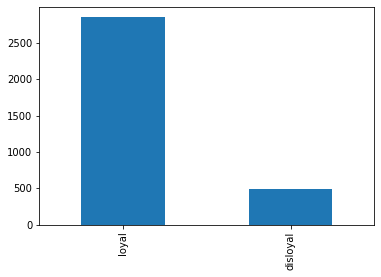

In [16]:
data['churn_name'].value_counts().plot(kind='bar')

In [17]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'churn_name'],
      dtype='object')

In [18]:
#total calls and which state has highest
data['all calls'] = data['total eve calls'] + data['total day calls'] + data['total night calls']
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,churn_name,all calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,loyal,300
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,loyal,329
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,loyal,328
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,loyal,248
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,loyal,356


In [20]:
state_calls = data.groupby('state')['all calls'].sum().sort_values()
state_calls.head()

state
CA    10431
IA    13320
PA    13463
AK    15038
LA    15286
Name: all calls, dtype: int64

<AxesSubplot:ylabel='state'>

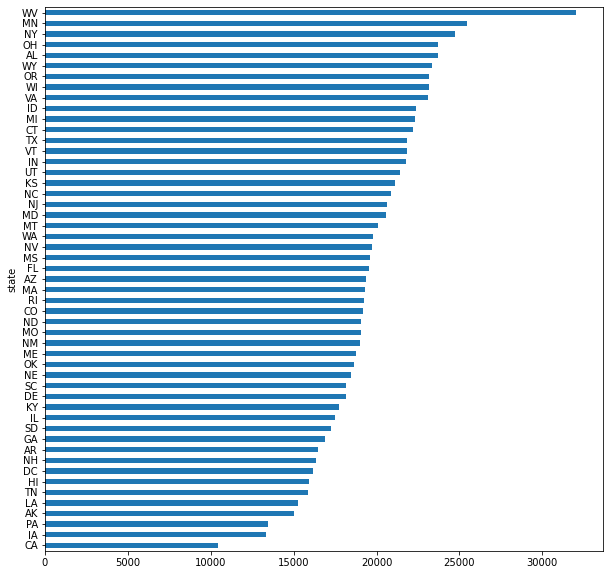

In [23]:
plt.figure(figsize=(10,10))
state_calls.plot(kind='barh')

<AxesSubplot:xlabel='count', ylabel='total intl calls'>

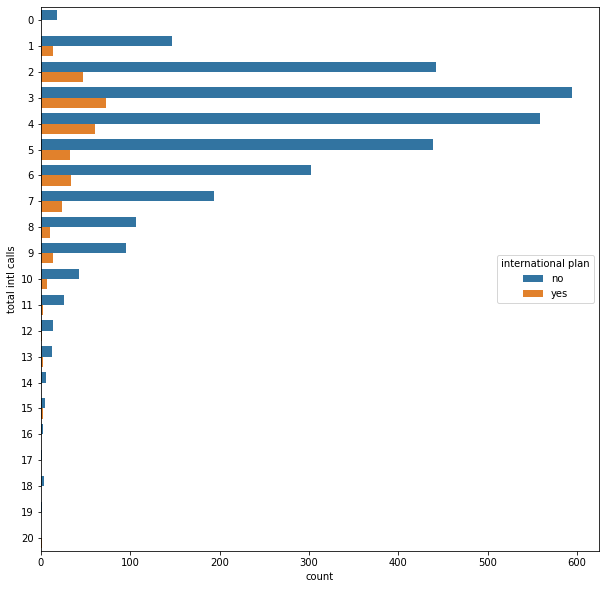

In [25]:
#people who makes more international calls get a lot of international plan

plt.figure(figsize=(10,10))
sns.countplot(y='total intl calls', hue='international plan', data=data)

#seems incorrect

<AxesSubplot:xlabel='churn', ylabel='international plan'>

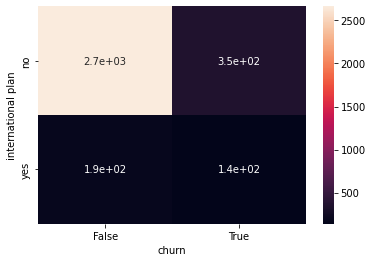

In [31]:
#How do having voice mail and an international plan relate to subscriber loyalty? Check the statistical significance of these relationships.

sns.heatmap(pd.crosstab(data['international plan'], data['churn']), annot=True)

<AxesSubplot:xlabel='churn', ylabel='voice mail plan'>

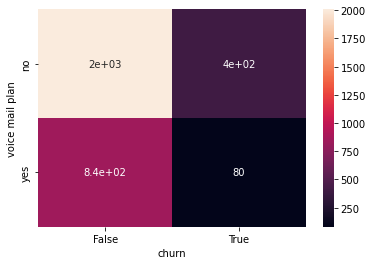

In [32]:
sns.heatmap(pd.crosstab(data['voice mail plan'], data['churn']), annot=True)

In [38]:
from scipy.stats import chi2_contingency
print('International plan vs Churn:')
chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['international plan'], data['churn']))
p < 0.05

International plan vs Churn:


True

#### p-value in both cases is quite small (<0.05). This means that the relationship between the international plan and voice mail with subscriber loyalty is statistically significant.


In [39]:
chi2, p, dof, ex= chi2_contingency(pd.crosstab(data['voice mail plan'], data['churn']))
p < 0.05

True

<AxesSubplot:xlabel='count', ylabel='customer service calls'>

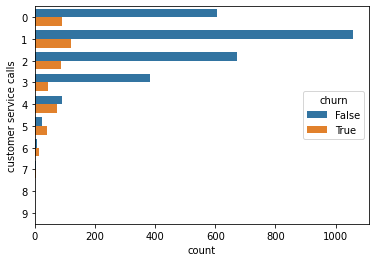

In [40]:
# What can be said about the relationship between the number of calls to the call center and loyalty? Don't forget about information visualization.
sns.countplot(y='customer service calls', hue='churn', data=data)

# as the number of calls increases the probability of getting churn increases

In [43]:
numeric = [col for col in data.columns if data.dtypes[col] == np.int64 or data.dtypes[col] == np.float64]
data[numeric].corr(method='spearman')

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,all calls
account length,1.000000,0.003077,0.017884,0.032690,0.017884,-0.007954,0.018378,-0.007950,-0.013643,-0.007669,-0.013654,0.014761,0.027453,0.014761,-0.005942,0.023756
number vmail messages,0.003077,1.000000,0.004006,-0.012396,0.004006,0.021162,-0.007148,0.021177,0.005053,0.010975,0.005036,-0.001565,0.006248,-0.001565,-0.019639,-0.003107
total day minutes,0.017884,0.004006,1.000000,0.009391,1.000000,0.006405,0.017867,0.006391,-0.005699,0.023052,-0.005730,-0.016110,-0.000291,-0.016110,-0.015032,0.028232
total day calls,0.032690,-0.012396,0.009391,1.000000,0.009391,-0.014062,0.013807,-0.014063,0.018890,-0.017848,0.018857,0.015139,0.004148,0.015139,-0.020957,0.560454
total day charge,0.017884,0.004006,1.000000,0.009391,1.000000,0.006405,0.017867,0.006391,-0.005699,0.023052,-0.005730,-0.016110,-0.000291,-0.016110,-0.015032,0.028232
total eve minutes,-0.007954,0.021162,0.006405,-0.014062,0.006405,1.000000,-0.010455,1.000000,-0.013211,0.003399,-0.013220,-0.003225,0.014281,-0.003225,-0.017805,-0.015010
total eve calls,0.018378,-0.007148,0.017867,0.013807,0.017867,-0.010455,1.000000,-0.010446,0.004870,0.005639,0.004892,0.000213,0.014862,0.000213,0.002697,0.567591
total eve charge,-0.007950,0.021177,0.006391,-0.014063,0.006391,1.000000,-0.010446,1.000000,-0.013216,0.003388,-0.013225,-0.003231,0.014289,-0.003231,-0.017800,-0.015016
total night minutes,-0.013643,0.005053,-0.005699,0.018890,-0.005699,-0.013211,0.004870,-0.013216,1.000000,0.008580,0.999999,-0.010331,0.000485,-0.010331,-0.012713,0.018958
total night calls,-0.007669,0.010975,0.023052,-0.017848,0.023052,0.003399,0.005639,0.003388,0.008580,1.000000,0.008561,-0.006397,-0.003133,-0.006397,-0.008087,0.553289


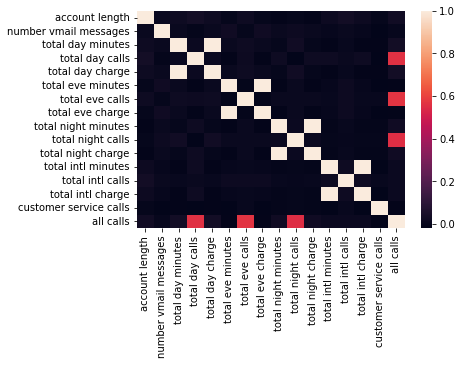

In [45]:
sns.heatmap(data[numeric].corr(method='spearman'))
#The highest correlation can be traced between the total number of minutes of calls and the total payment for services. Obviously, 
# with an increase in the number of speaking minutes, the payment also increases, because. it depends on the number of minutes.

In [47]:
data['account length']

0       128
1       107
2       137
3        84
4        75
       ... 
3328    192
3329     68
3330     28
3331    184
3332     74
Name: account length, Length: 3333, dtype: int64

Spearman correlation between account length and customer service calls: -0.005941876696982856 p-value: 0.7316649567390638
Kendall correlation between account length and customer service calls: -0.00434113960581665 p-value: 0.7353733673801053


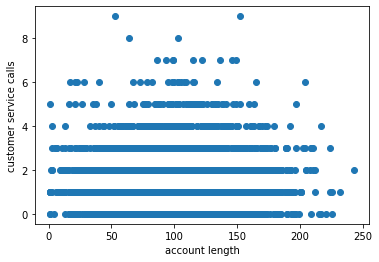

In [48]:
from scipy.stats import spearmanr, kendalltau
df = data
r = spearmanr(df['account length'], df['customer service calls'])
t = kendalltau(df['account length'], df['customer service calls'])
print('Spearman correlation between account length and customer service calls:', r[0], 'p-value:', r[1])
print('Kendall correlation between account length and customer service calls:', t[0], 'p-value:', t[1])
plt.xlabel('account length')
plt.ylabel('customer service calls')
plt.scatter(df['account length'], df['customer service calls'])

#An inverse weak correlation is possible between the features, but the p-value is quite large, 
# therefore, there is a high probability of a statistical error.

<AxesSubplot:xlabel='count', ylabel='number vmail messages'>

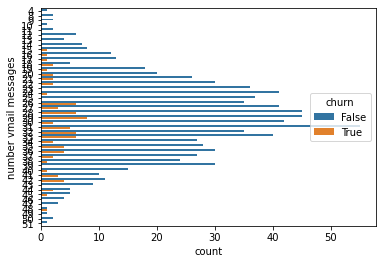

In [49]:
sns.countplot(y='number vmail messages', hue='churn', data=df[df['voice mail plan'] == 'yes'])


In [50]:
#The point biserial correlation is used to measure the 
# relationship between a binary variable, x, and a continuous variable, y. Like other correlation coefficients, 
# this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship.

from scipy.stats import pointbiserialr
pointbiserialr(df['churn'], df['number vmail messages'])

#There is a rather weak inverse correlation.

PointbiserialrResult(correlation=-0.08972796983506393, pvalue=2.1175218402683624e-07)

<AxesSubplot:xlabel='count', ylabel='state'>

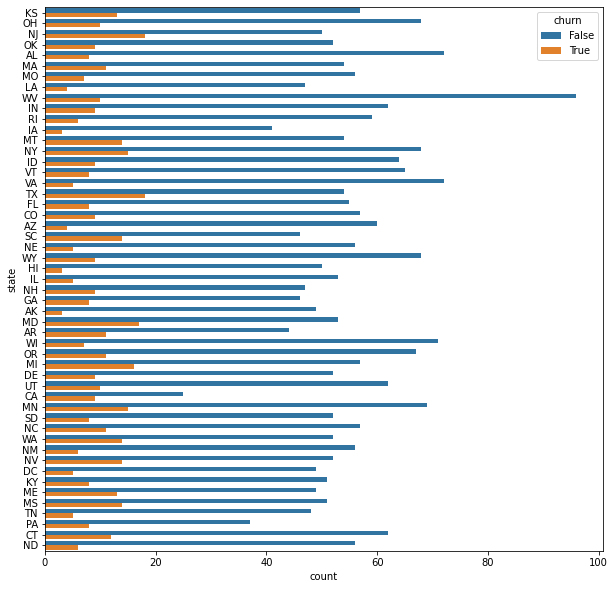

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(y='state', hue='churn', data=df)

In [54]:
df['full charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']
pointbiserialr(df['churn'], df['full charge'])

#We can see that there is a correlation, and the relationship between these features is statistically confirmed.

PointbiserialrResult(correlation=0.22696174541537478, pvalue=3.3815074744537016e-40)

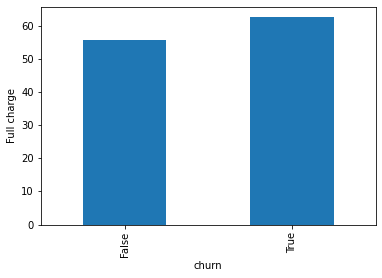

In [56]:
df.groupby('churn')['full charge'].mean().plot(kind='bar') 
plt.ylabel('Full charge')
plt.show();

#We can say that disloyal subscribers, on average, spend more money on calls than loyal ones. 
# In the following chart, when choosing the median in the set of payments, the same thing is observed.